In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
from keras.layers import Dense,Activation
from keras.models import Sequential
import scipy as sc 

In [110]:
print(tf.__version__)

1.13.1


In [111]:
print(keras.__version__)

2.2.4


In [112]:
dataset = tf.keras.datasets.mnist

In [113]:
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [114]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

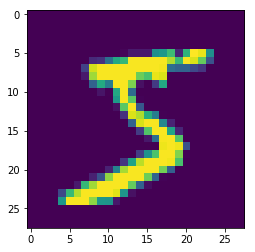

In [115]:
plt.imshow(X_train[0])

In [129]:
X_train = keras.utils.normalize(X_train,axis=1)
X_test = keras.utils.normalize(X_test,axis=1)

In [130]:
model = Sequential()

In [131]:
model.add(keras.layers.Flatten())

In [132]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [133]:
Z1 = model.add(Dense(256, input_dim = 784))
A1 = model.add(Activation('relu'))
Z2 = model.add(Dense(128))
A2 = model.add(Activation('relu'))
Z3 = model.add(Dense(64))
A3 = model.add(Activation('relu'))
Z4 = model.add(Dense(32))
A4 = model.add(Activation('relu'))
Z5 = model.add(Dense(10))
A5 = model.add(Activation('softmax'))

In [134]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [135]:
model.fit(X_train, Y_train, batch_size = 256, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.4278 - acc: 0.8799
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1528 - acc: 0.9544
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1026 - acc: 0.9692
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0743 - acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0575 - acc: 0.9823
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0443 - acc: 0.9862: 0s - loss: 0.0447 - acc:
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0347 - acc: 0.9893: 1s - loss: 0
Epoch 8/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0252 - acc: 0.9921: 1
Epoch 9/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0190 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================]

In [136]:
prediction = model.predict([X_test])

In [137]:
print(prediction)

[[2.1518766e-11 4.0331649e-09 6.0717198e-08 ... 9.9999988e-01
  1.0753289e-10 3.9101682e-08]
 [6.9556054e-12 2.0044111e-04 9.9979955e-01 ... 3.0410334e-08
  2.2062896e-09 2.0117844e-15]
 [1.2588854e-10 9.9999571e-01 1.6180873e-07 ... 9.3444618e-07
  2.7290855e-06 4.4765445e-11]
 ...
 [3.4961595e-13 5.4663484e-08 6.7929278e-13 ... 2.2620920e-07
  1.1137783e-08 1.2241187e-05]
 [8.0611260e-09 3.8565184e-07 1.4261106e-07 ... 1.1935724e-08
  6.2181376e-04 3.2200347e-08]
 [1.0983303e-09 2.2872456e-08 9.8730690e-10 ... 3.5120076e-14
  1.6738220e-08 2.3774675e-14]]


In [138]:
print(np.argmax(prediction[0]))

7


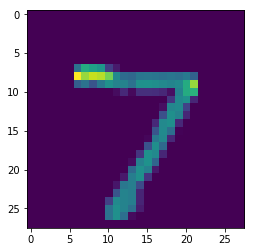

In [139]:
plt.imshow(X_test[0])

In [140]:
model.evaluate(X_test, Y_test, batch_size = 256)

10000/10000 [==============================] - 1s 145us/step


[0.09460388427043799, 0.9763]